In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from oset.ecg.peak_detection.peak_detection import peak_detection_modified_pan_tompkins

In [2]:
mat = scipy.io.loadmat('../../../datasets/sample-data/SampleECG1.mat')['data'][0]
f = 1
fs = 1000
t = np.arange(len(mat)) / fs
peaks,peak_indexes,_ =peak_detection_modified_pan_tompkins(mat, fs)

IndexError: arrays used as indices must be of integer (or boolean) type

<Figure size 640x480 with 0 Axes>

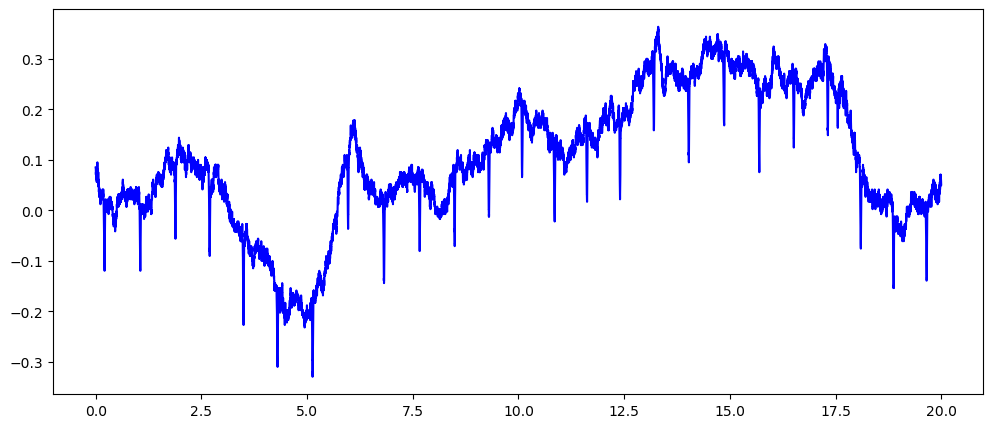

In [3]:
plt.figure()
plt.figure(figsize=(12,5))
plt.plot(t, mat, 'b', label='ECG')
plt.plot(t[peak_indexes], mat[peak_indexes], 'ro', label='ECG Peaks (max detection)')
plt.xlabel('time (sec.)')
plt.legend()
plt.grid()
plt.show()